## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from PIL import *
import graphviz
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Datasets

In [2]:
data1= pd.read_csv('audit_risk.csv')
data2= pd.read_csv('trial.csv')

In [3]:
data1.head(3)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0


In [4]:
data2.head(3)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0


As we can observe from the info of data1(Audit_Risk) , Total number of instances is only 776 whereas we know that there are a total of 777 firms. Also, Money_value has a total of 775 non null values instead of 776 non null values

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

From the statistics of features in data1, detection risk was found to have zero variance

In [6]:
data1.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [8]:
data2.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


From the below analyses we found out that forest and electrical have the same sector score and the 777th firm which is missing is from the public health sector

In [9]:
# To find the number of firms in each sector in data1
data1['Sector_score'].value_counts()

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [10]:
#to find the order in which the sector scores are presesnt
data1['Sector_score'].unique()

array([ 3.89,  3.41,  2.72,  2.37,  1.99,  1.85,  2.36,  2.34, 15.56,
       17.68, 21.61, 59.85, 55.57])

In [11]:
# to find the number of firms in each sector in data2
data1['Sector_score'].value_counts()#to find the order in which the sector scores are presesnt

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [12]:
#to find the order in which the sector scores are presesnt in data2
data2['Sector_score'].unique()

array([ 3.89,  3.41,  2.72,  2.37,  1.99,  1.85,  2.36,  2.34, 15.56,
       17.68, 21.61, 59.85, 55.57])

In [13]:
#checking weather similar columns are same or diff in bot data1 and data2
list3=list(data1.columns)
list4=list(data2.columns)
list5=[]
for item1 in (list3):
    for item2 in (list4):
        val= data1[item1].equals(data2[item2])
        list5.append(val)
mat=np.matrix(np.array(list5).reshape(len(list3),len(list4)))
df= pd.DataFrame(mat,list3,list4)
df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
LOCATION_ID,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PARA_A,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Score_A,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Risk_A,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PARA_B,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Score_B,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Risk_B,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
TOTAL,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
numbers,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Going by the Dataframe generated above and the dataset descriptions, The columns which should be simalar and are not were identified and the correlation was seen between those columns. Theese columns had 100% corrrel so we decided to take only loss and loss_score from data2

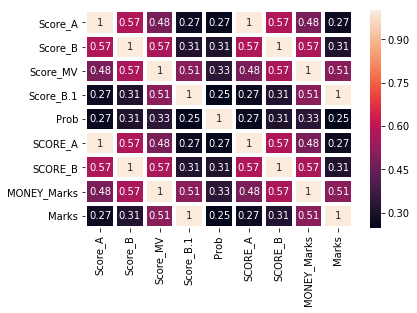

In [14]:
#data1 score a , data2 score a are diff
#data1 score b and data2 scoreb
#score mv and money marks
#scoreb.1 and marks are diff
#district loss and district are the same 
#prob and history score are diffrent
#risk is diff in each column
#money_value and money marks are diff
dat_cor1=data1[['Score_A','Score_B','Score_MV','Score_B.1','Prob']]
dat_cor1.index.names=['key']
dat_cor2=data2[['SCORE_A','SCORE_B','MONEY_Marks','Marks']]
dat_cor2.index.names=['key']
dat_cor=pd.merge(dat_cor1,dat_cor2,on=['key'],how='inner')
sns.heatmap(dat_cor.corr(),annot= True,linecolor='white',linewidths=3)

By the below analysis we found out that if the audit risk score is greater than 1 risk is 1, and if the audit risk score is less than 1 risk is 0. Also Risk in Data1 and Risk in Data 2 should be the same but they are different on 181 instances.
so we dont take the risk column from data2

In [15]:
data1['Risk'].equals(data2['Risk'])
list1=list(data1['Risk'][data1['Risk']!=data2['Risk']].index)
d1risk=data1.iloc[list1,26]
pd.DataFrame(d1risk)['Risk'].value_counts()

0    181
Name: Risk, dtype: int64

In [16]:
d2risk=data2.iloc[list1,17]
pd.DataFrame(d2risk)['Risk'].value_counts()

1    181
Name: Risk, dtype: int64

In [17]:
data1.iloc[list1,:].head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
key,,,,,,,,,,,,,,,,,,,,,
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0
13,3.89,8,1.09,0.4,0.436,0.35,0.2,0.070,1.44,5.0,...,0.4,0,0.2,0.0,2.2,1.906,0.4,0.5,0.3812,0
18,3.89,37,1.81,0.4,0.724,1.03,0.2,0.206,2.84,5.0,...,0.4,0,0.2,0.0,2.2,2.330,0.4,0.5,0.4660,0
21,3.89,3,0.02,0.2,0.004,5.94,0.4,2.376,5.96,5.0,...,0.4,0,0.2,0.0,2.6,3.782,0.4,0.5,0.7564,0
29,3.89,37,0.00,0.2,0.000,0.75,0.2,0.150,0.75,5.0,...,0.4,0,0.2,0.0,2.2,4.262,0.4,0.5,0.8524,0
44,3.89,19,1.32,0.4,0.528,0.00,0.2,0.000,1.32,5.0,...,0.4,0,0.2,0.0,2.2,1.940,0.4,0.5,0.3880,0
52,3.89,22,0.00,0.2,0.000,0.93,0.2,0.186,0.93,5.0,...,0.4,0,0.2,0.0,2.2,4.698,0.4,0.5,0.9396,0
61,3.89,11,1.26,0.4,0.504,0.05,0.2,0.010,1.31,5.0,...,0.4,0,0.2,0.0,2.2,1.914,0.4,0.5,0.3828,0
68,3.89,12,1.07,0.4,0.428,0.00,0.2,0.000,1.07,5.0,...,0.4,0,0.2,0.0,2.2,1.828,0.4,0.5,0.3656,0


In [18]:
data2.iloc[list1,:].head(10)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
key,,,,,,,,,,,,,,,,,,
9,3.89,8,3.98,6,0.99,2,4.97,5.0,2,1.93,2,2,0,2,0,2,2.4,1
13,3.89,8,1.09,4,0.35,2,1.44,5.0,2,0.00,2,2,0,2,0,2,2.2,1
18,3.89,37,1.81,4,1.03,2,2.84,5.0,2,0.00,2,2,0,2,0,2,2.2,1
21,3.89,3,0.02,2,5.94,4,5.96,5.0,2,0.01,2,2,0,2,0,2,2.6,1
29,3.89,37,0.00,2,0.75,2,0.75,5.0,2,6.78,4,2,0,2,0,2,2.2,1
44,3.89,19,1.32,4,0.00,2,1.32,5.0,2,0.06,2,2,0,2,0,2,2.2,1
52,3.89,22,0.00,2,0.93,2,0.93,5.0,2,7.78,4,2,0,2,0,2,2.2,1
61,3.89,11,1.26,4,0.05,2,1.31,5.0,2,0.00,2,2,0,2,0,2,2.2,1
68,3.89,12,1.07,4,0.00,2,1.07,5.0,2,0.00,2,2,0,2,0,2,2.2,1


In [19]:
#if audit risk is greater than 1 risk is 1
x1=data1[['Risk','Audit_Risk']][data1['Risk']==1]
x1[x1['Audit_Risk']<1].shape[0]

0

In [20]:
data2= data2[['Loss','LOSS_SCORE']]

In [21]:
#to find the index of the missing value
index=data1[data1['Money_Value'].isnull()==True]
data1.drop('Detection_Risk',axis=1,inplace=True)
med= data1[data1['Sector_score']== 55.57]['Money_Value'].median()
data1.fillna(value=med,inplace=True)
data1['Money_Value'].isnull().sum()

0

In [22]:
#merging Audit risk(data1) and Trial(data2)
data1.index.names= ['key']
data= pd.merge(data1,data2,on=['key'],how='inner')


### Removing Duplicated Rows

In [23]:
data=data[data.duplicated(subset=None, keep='first')==False]

### Average Audit Risk Scores for each Location ID

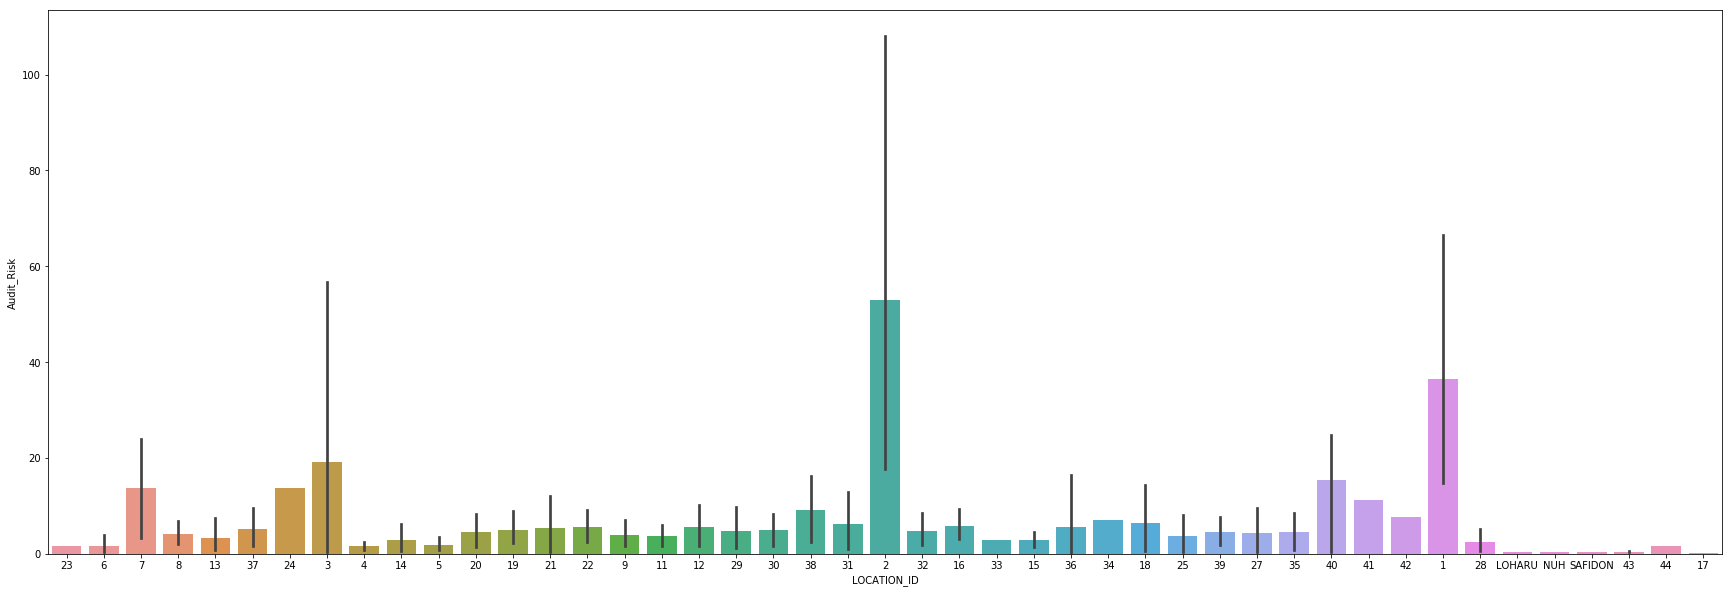

In [24]:
plt.figure(figsize=(30,10))
sns.barplot(x='LOCATION_ID',y='Audit_Risk',data= data,estimator=np.mean)

In [25]:
## Imputing non_numeric values in LOCATION_ID Column
data['LOCATION_ID'].replace(['LOHARU', 'NUH','SAFIDON'],['10','26','45'],inplace=True)

### Average Audit Risk Scores for each Sector Score

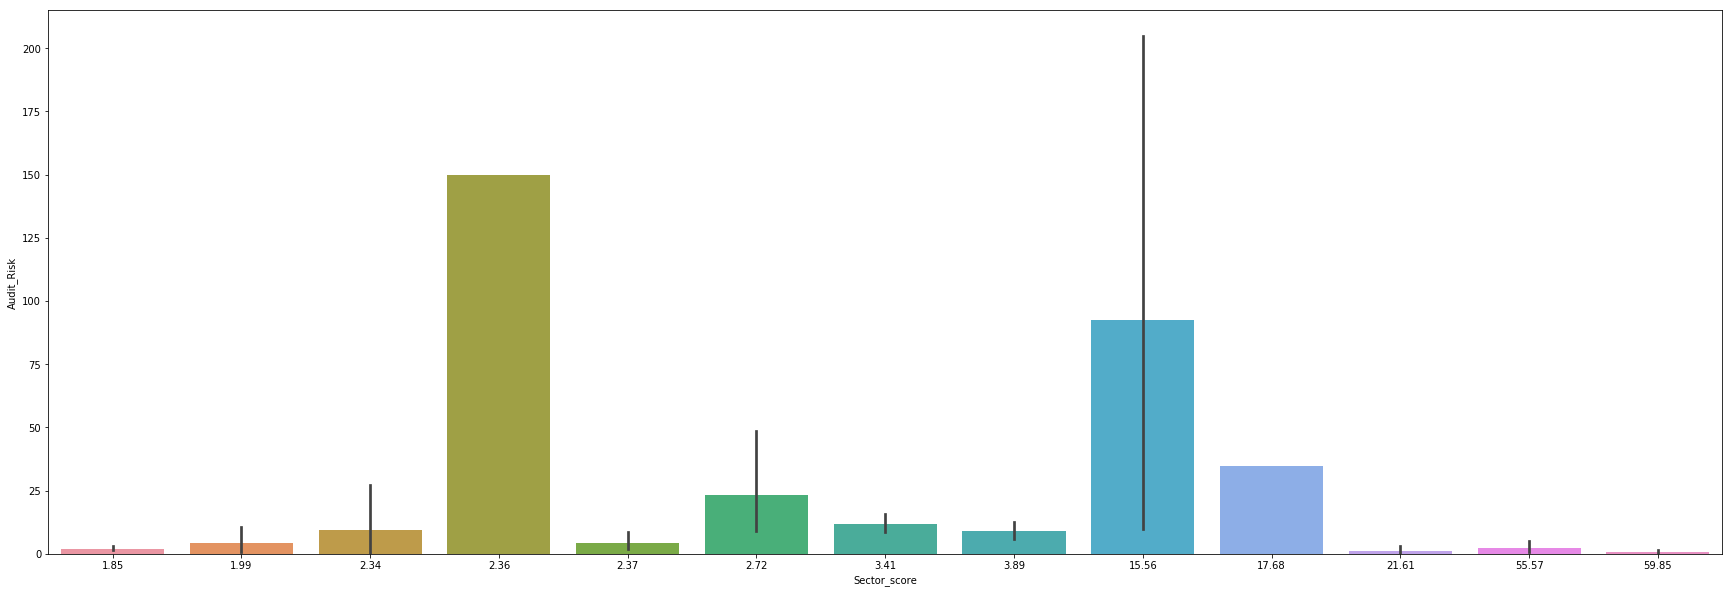

In [26]:
plt.figure(figsize=(30,10))
sns.barplot(x='Sector_score',y='Audit_Risk',data= data,estimator=np.mean)

Upon Further analyzing the correlation  we found that more features were correlated with each otheter by a high percentage, so we took the threshold as 0.70 , so if the correlation is above 0.70 we drop one of them using the prior knowldge we have about the variables from the data descriptions and the relations between them

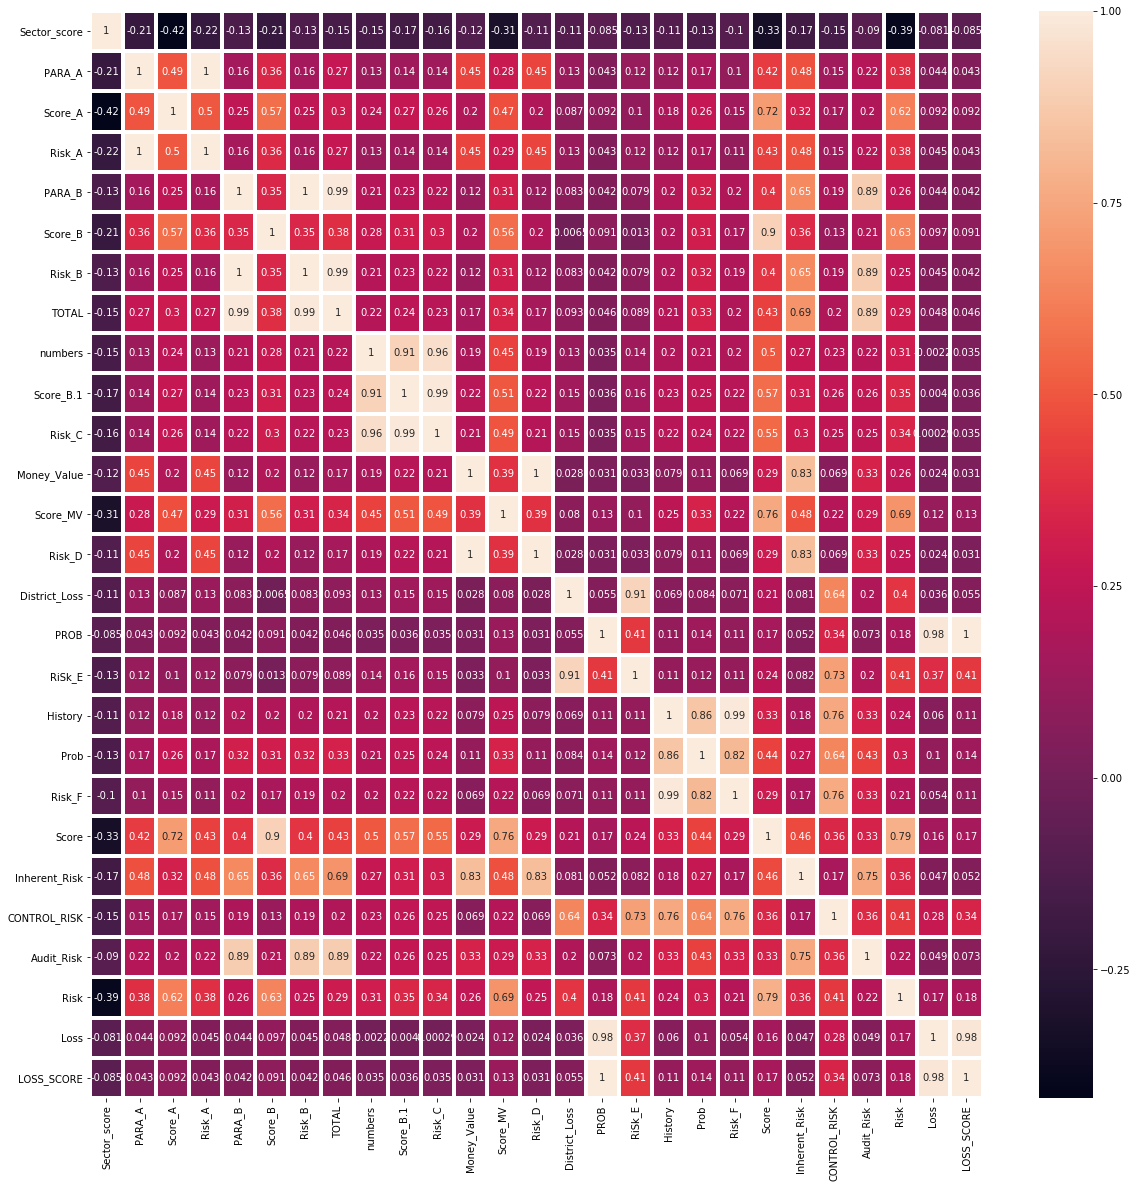

In [27]:
#corelation matrix
plt.figure(figsize=(20,20))
data_copy=data
d=data_copy.corr()
sns.heatmap(d,annot= True,linecolor='white',linewidths=3)

### Final correlation matrix

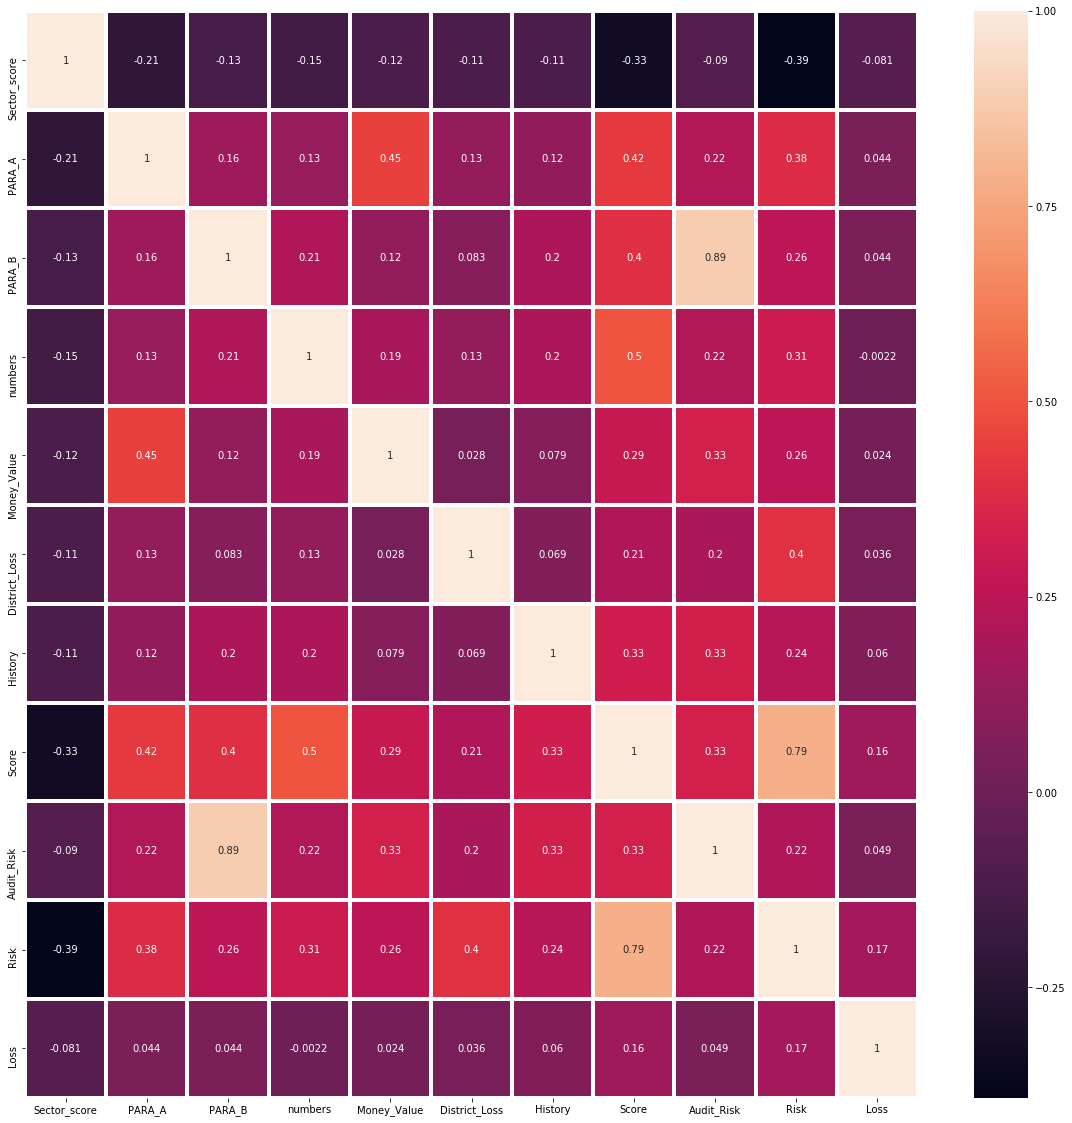

In [28]:
data.drop(['Risk_A','Score_A','Risk_B','Score_B','Score_B.1','Risk_C','Risk_D','Inherent_Risk','LOCATION_ID','Score_MV','RiSk_E','PROB','CONTROL_RISK','Risk_F','LOSS_SCORE','Prob','TOTAL'],axis=1,inplace=True)
data_corr1= data.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_corr1,annot= True,linecolor='white',linewidths=3)

### Removal of Outliers

1)So, the outliers that seemed rare were audit risk of 961.5144 for a firm in sector with score 2.72, the average audit risk score for this sector is less than 50, so this is a outlier and this is caused by a high paara b value which is greater than 1200

2)The firm with audit risk 222 is part of a sector with average risk score less than 20 so this can also be considered as a outlier

3)the firm with audit risk 204 is part of a sector which has very few instances(3) so we cannot consider this as an outlier

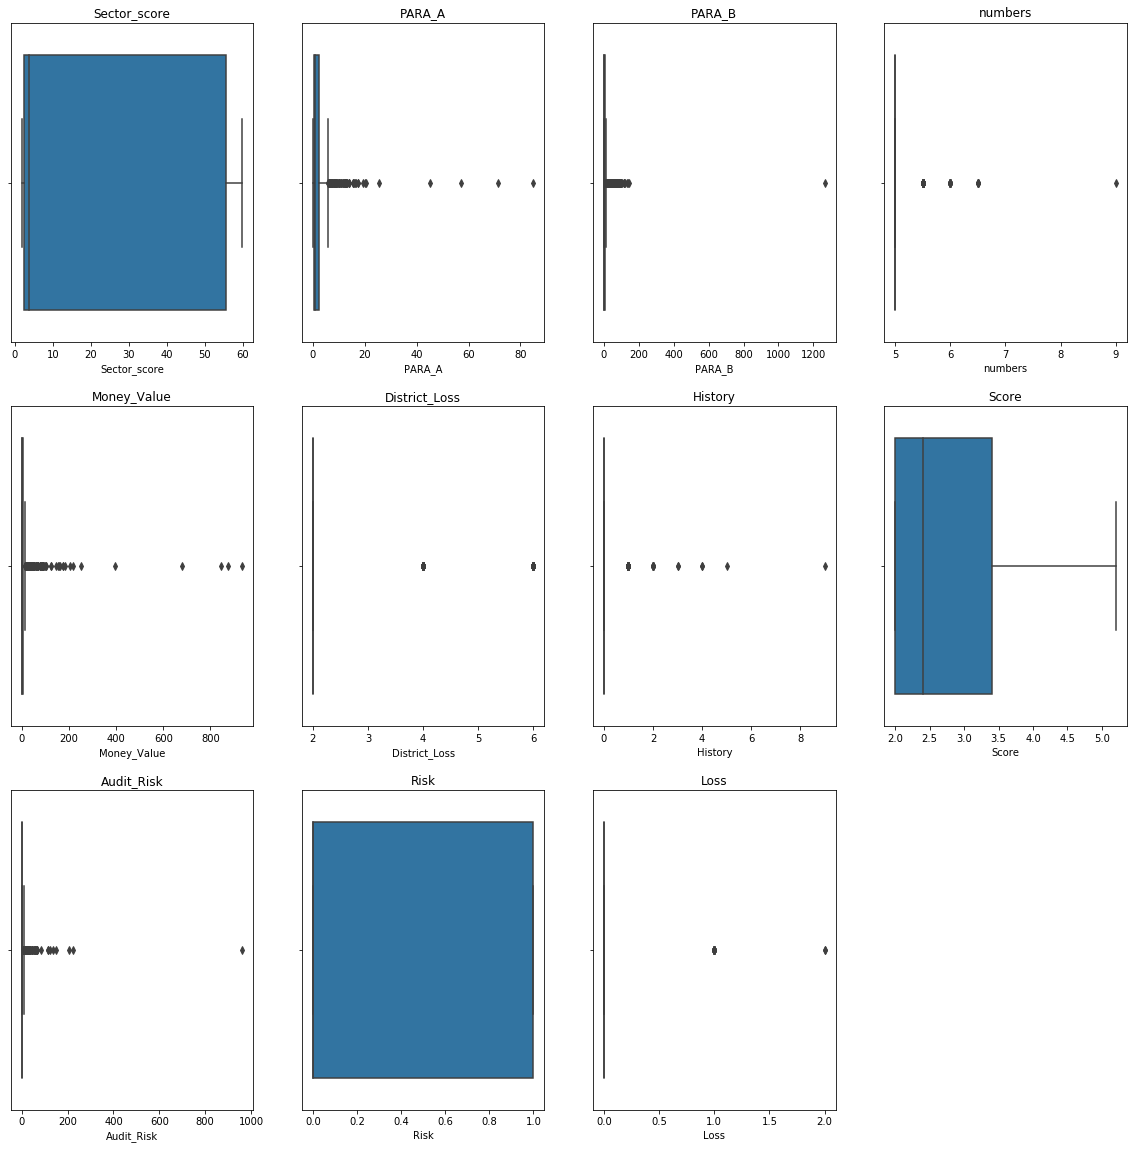

In [29]:
plt.figure(figsize=(20,20))
for i in range(0,data.shape[1]):
        plt.subplot(3,4,i+1)
        sns.boxplot(data.iloc[:,i])
        plt.title(data.columns[i])

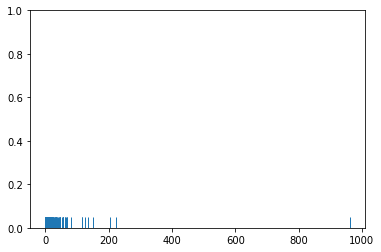

In [30]:
data[data['PARA_B']>1000]
data[data['Audit_Risk']>200]
sns.rugplot(data['Audit_Risk'])
data=data.drop([241,584],axis=0)

In [31]:
#data = data_risk
data_risk = data
data = data.drop('Audit_Risk', axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 775
Data columns (total 10 columns):
Sector_score     761 non-null float64
PARA_A           761 non-null float64
PARA_B           761 non-null float64
numbers          761 non-null float64
Money_Value      761 non-null float64
District_Loss    761 non-null int64
History          761 non-null int64
Score            761 non-null float64
Risk             761 non-null int64
Loss             761 non-null int64
dtypes: float64(6), int64(4)
memory usage: 65.4 KB


# Classification Algorithms

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [85]:
x = data.drop('Risk',axis=1)
y = data['Risk']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

## Voting

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty='l1',C=100)
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear',C=10,probability=True)
from sklearn.svm import SVC
svc_rbf = SVC(kernel='rbf',C=10,gamma=0.1,probability=True)
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly',C=1,gamma=10,probability=True)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(random_state=0,max_depth=2,learning_rate=0.01)

### Hard Voting

In [91]:
from sklearn.ensemble import VotingClassifier
estimator1 = [('knn',knn),('logistic',logistic),('tree',tree),('rnd_clf',rnd_clf),('gbc_clf',gbc_clf)]
voting1 = VotingClassifier(estimator1,voting='hard')
voting1.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (knn,logistic,tree,rnd_clf,gbc_clf,voting1):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.9411764705882353
LogisticRegression 0.9869281045751634
DecisionTreeClassifier 0.9673202614379085
RandomForestClassifier 0.9738562091503268
GradientBoostingClassifier 0.954248366013072
VotingClassifier 0.9803921568627451


### Soft Voting

In [93]:
from sklearn.ensemble import VotingClassifier
estimator1 = [('svc_linear',svc_linear),('svc_rbf',svc_rbf),('svc_poly',svc_poly)]
voting2 = VotingClassifier(estimator1,voting='soft')
voting2.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (svc_linear,svc_rbf,svc_poly,voting2):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.9150326797385621
SVC 0.9215686274509803
SVC 0.9281045751633987
VotingClassifier 0.9215686274509803


# Bagging

## 1. Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

x= data.drop('Risk',axis=1)
y=data['Risk']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [100]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.9671
Accuracy on test set: 0.9542


In [101]:
#Bagging
from sklearn.ensemble import BaggingClassifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)
bag_dtree = BaggingClassifier(dtree,n_estimators=500,max_samples=100,random_state=0)
bag_dtree.fit(x_train,y_train)
print('Train score: {:.4f}'.format(bag_dtree.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_dtree.score(x_test, y_test)))

Train score: 0.9819
Test score: 0.9673


## 2. Logistic Regression

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
x= data.drop('Risk',axis=1)
y=data['Risk']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

In [147]:
logreg = LogisticRegression(penalty='l1', C=100)
logreg.fit(x_train, y_train)
print('Train score: {:.4f}'.format(logreg.score(x_train, y_train)))
print('Test score: {:.4f}'.format(logreg.score(x_test, y_test)))

Train score: 0.9918
Test score: 0.9869


In [148]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l1', C=100)
logreg.fit(x_train, y_train)
bag_log = BaggingClassifier(logreg,n_estimators=500,max_samples=100,random_state=0)
bag_log.fit(x_train,y_train)
print('Train score: {:.4f}'.format(bag_log.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_log.score(x_test, y_test)))

Train score: 0.9720
Test score: 0.9542


# Pasting

## 1. Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier

x= data.drop('Risk',axis=1)
y=data['Risk']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [150]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.9671
Accuracy on test set: 0.9542


In [151]:
#Pasting
from sklearn.ensemble import BaggingClassifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)
bag_dtree = BaggingClassifier(dtree,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_dtree.fit(x_train,y_train)
print('Train score: {:.4f}'.format(bag_dtree.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_dtree.score(x_test, y_test)))

Train score: 0.9836
Test score: 0.9673


## 2. SVC with Linear Kernel

In [182]:
from sklearn.model_selection import train_test_split
x = data.drop('Risk',axis=1)
y = data['Risk']

x_train_org, x_test_org, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train_org)
x_test = scale.transform(x_test_org)

In [183]:
svc_lin = SVC(C=10,kernel='linear')
svc_lin.fit(x_train,y_train)
print('Train score: {:.4f}'.format(svc_lin.score(x_train, y_train)))
print('Test score: {:.4f}'.format(svc_lin.score(x_test, y_test)))

Train score: 0.9490
Test score: 0.9150


In [184]:
#Pasting
from sklearn.ensemble import BaggingClassifier
svc_lin = SVC(kernel='linear',C=10)
bag_svc_lin = BaggingClassifier(svc_lin,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svc_lin.fit(x_train,y_train)
print('Train score: {:.4f}'.format(bag_svc_lin.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_svc_lin.score(x_test, y_test)))

Train score: 0.9375
Test score: 0.9150


# AdaBoosting

## 1. Decision Tree

In [185]:
from sklearn.tree import DecisionTreeClassifier

x= data.drop('Risk',axis=1)
y=data['Risk']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [186]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.9671
Accuracy on test set: 0.9542


In [187]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)
ada_dtree = AdaBoostClassifier(dtree,n_estimators=200,learning_rate=0.5,algorithm='SAMME')
ada_dtree.fit(x_train,y_train)
print('Train score: {:.4f}'.format(ada_dtree.score(x_train, y_train)))
print('Test score: {:.4f}'.format(ada_dtree.score(x_test, y_test)))

Train score: 1.0000
Test score: 0.9739


## 2. SVC with Poly Kernel

In [212]:
from sklearn.model_selection import train_test_split
x = data.drop('Risk',axis=1)
y = data['Risk']

x_train_org, x_test_org, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train_org)
x_test = scale.transform(x_test_org)

In [213]:
svc_poly = SVC(C=10, kernel='poly', gamma=10)
svc_poly.fit(x_train,y_train)
print('Train score: {:.4f}'.format(svc_poly.score(x_train, y_train)))
print('Test score: {:.4f}'.format(svc_poly.score(x_test, y_test)))

Train score: 0.9770
Test score: 0.9412


In [214]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
svc_poly = SVC(kernel='poly',C=10,gamma=10)
ada_svc_poly = AdaBoostClassifier(svc_poly,n_estimators=200,learning_rate=0.5,algorithm='SAMME')
ada_svc_poly.fit(x_train,y_train)
print('Train score: {:.4f}'.format(ada_svc_poly.score(x_train, y_train)))
print('Test score: {:.4f}'.format(ada_svc_poly.score(x_test, y_test)))

Train score: 0.9408
Test score: 0.9085


# Gradient Boosting

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_dt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt_dt.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(gbrt_dt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt_dt.score(x_test, y_test)))

Accuracy on training set: 0.9868
Accuracy on test set: 0.9673


In [217]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

Accuracy on training set: 0.9868
Accuracy on test set: 0.9739


# PCA

In [334]:
x = data.drop('Risk',axis=1)
y = data['Risk']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

In [335]:
from  sklearn.decomposition import PCA
pca= PCA(n_components=0.95)
pca.fit(x_train)
x_train= pca.transform(x_train)
x_test=pca.transform(x_test)

## 1. KNN Classification

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

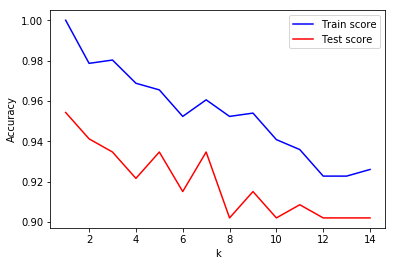

In [291]:
train_score = []
test_score = []

n = range(1,15)
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

plt.plot(n,train_score,'b',label='Train score')
plt.plot(n,test_score,'r',label = 'Test score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

It seems like k = 5 is the best parameter for KNN Model

In [292]:
knn = KNeighborsClassifier(5)
knn.fit(x_train, y_train)
print('Train score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(x_test, y_test)))

Train score: 0.9655
Test score: 0.9346


## 2. Logistic Regression

In [294]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs')
    log_l1.fit(x_train, y_train)
    log_l2.fit(x_train, y_train)
    train_score_l1.append(log_l1.score(x_train, y_train))
    train_score_l2.append(log_l2.score(x_train, y_train))
    test_score_l1.append(log_l1.score(x_test, y_test))
    test_score_l2.append(log_l2.score(x_test, y_test))

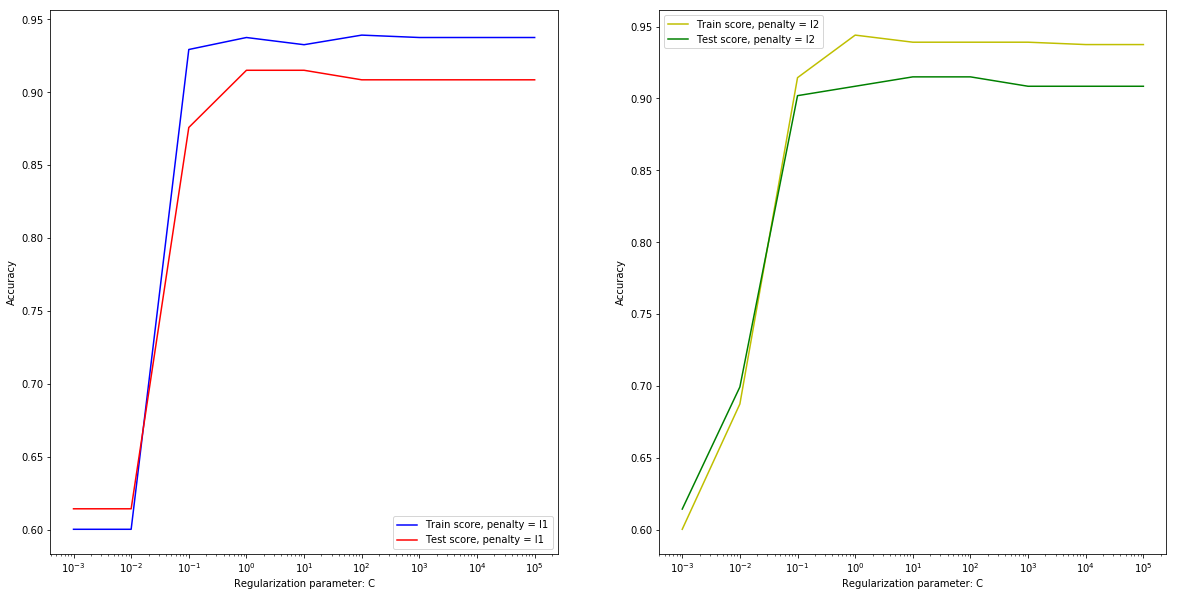

In [295]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1',c='blue')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1',c='r')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2',c='y')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2',c='g')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

L1 Regularization with C=10 gives better accuracy. With L1 penalty, the model is generalising more on the test dataset at C=10. So we choose L1 and C=10 for Logestic Regression

In [298]:
logreg = LogisticRegression(penalty='l1', C=10)
logreg.fit(x_train, y_train)
print('Train score: {:.4f}'.format(logreg.score(x_train, y_train)))
print('Test score: {:.4f}'.format(logreg.score(x_test, y_test)))

Train score: 0.9326
Test score: 0.9150


In [299]:
from  sklearn.metrics import accuracy_score
y_pred = logreg.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9150326797385621


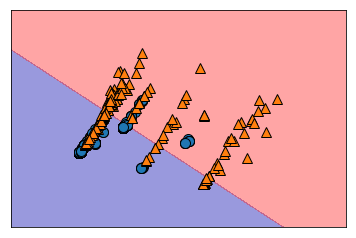

In [300]:
import mglearn
x_b = x_train[50:500, [1,2]]
y_b = y_train[50:500]

lreg = LogisticRegression(penalty = 'l1', C=100)
lreg.fit(x_b, y_b)

mglearn.plots.plot_2d_separator(lreg, x_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_b[:, 0], x_b[:, 1], y_b)

## 3. Linear SVM Classification

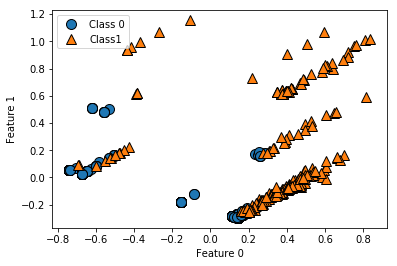

In [301]:
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class1'])

In [302]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=100)
linear_svm.fit(x_train,y_train)
print('Train score: {:.4f}'.format(linear_svm.score(x_train,y_train)))
print('Test score: {:.4f}'.format(linear_svm.score(x_test,y_test)))

Train score: 0.9408
Test score: 0.9085


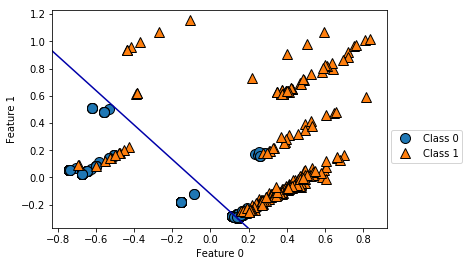

In [303]:
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
line = np.linspace(-5, 5)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1'], loc=(1.01, 0.3))

## 4. Kernelized SVM Classification

### Linear Kernel

In [304]:
#kernel = 'Linear'
C1 = [0.01,0.1,1,10]

for i in C1:
    svc = SVC(C=i,kernel='linear')
    svc.fit(x_train,y_train)
    print('C:{}'.format(i))
    print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01
Train score: 0.7155,Test score: 0.7059
C:0.1
Train score: 0.9243,Test score: 0.9020
C:1
Train score: 0.9408,Test score: 0.9085
C:10
Train score: 0.9424,Test score: 0.9150


Best Parameter: C=10

In [305]:
svc_lin = SVC(C=10,kernel='linear')
svc_lin.fit(x_train,y_train)
print('Train score: {:.4f}'.format(svc_lin.score(x_train, y_train)))
print('Test score: {:.4f}'.format(svc_lin.score(x_test, y_test)))

Train score: 0.9424
Test score: 0.9150


### RBF Kernel

In [306]:
#kernal = 'rbf'
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='rbf',gamma=j)
        svc.fit(x_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:0.01,gamma:0.1
Train score: 0.6003,Test score: 0.6144
C:0.01,gamma:1
Train score: 0.7368,Test score: 0.6993
C:0.01,gamma:10
Train score: 0.7878,Test score: 0.8170
C:0.1,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:0.1,gamma:0.1
Train score: 0.8651,Test score: 0.8693
C:0.1,gamma:1
Train score: 0.9227,Test score: 0.8954
C:0.1,gamma:10
Train score: 0.9309,Test score: 0.8889
C:1,gamma:0.01
Train score: 0.8684,Test score: 0.8758
C:1,gamma:0.1
Train score: 0.9342,Test score: 0.9085
C:1,gamma:1
Train score: 0.9342,Test score: 0.9150
C:1,gamma:10
Train score: 0.9391,Test score: 0.9150
C:10,gamma:0.01
Train score: 0.9359,Test score: 0.9085
C:10,gamma:0.1
Train score: 0.9391,Test score: 0.9150
C:10,gamma:1
Train score: 0.9391,Test score: 0.9216
C:10,gamma:10
Train score: 0.9441,Test score: 0.9150


Best Parameter Values: C = 10, gamma = 10

In [307]:
svc_rbf = SVC(C=10,kernel='rbf',gamma = 10)
svc_rbf.fit(x_train,y_train)
print('Train score: {:.4f}'.format(svc_rbf.score(x_train, y_train)))
print('Test score: {:.4f}'.format(svc_rbf.score(x_test, y_test)))

Train score: 0.9441
Test score: 0.9150


### Polynomial Kernel

In [308]:
#kernal = poly
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='poly',gamma=j)
        svc.fit(x_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:0.01,gamma:0.1
Train score: 0.6003,Test score: 0.6144
C:0.01,gamma:1
Train score: 0.6069,Test score: 0.6209
C:0.01,gamma:10
Train score: 0.9013,Test score: 0.9150
C:0.1,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:0.1,gamma:0.1
Train score: 0.6003,Test score: 0.6144
C:0.1,gamma:1
Train score: 0.7270,Test score: 0.7451
C:0.1,gamma:10
Train score: 0.9276,Test score: 0.9150
C:1,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:1,gamma:0.1
Train score: 0.6003,Test score: 0.6144
C:1,gamma:1
Train score: 0.8503,Test score: 0.8431
C:1,gamma:10
Train score: 0.9474,Test score: 0.9216
C:10,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:10,gamma:0.1
Train score: 0.6069,Test score: 0.6209
C:10,gamma:1
Train score: 0.9013,Test score: 0.9150
C:10,gamma:10
Train score: 0.9441,Test score: 0.9020


Best Parameter Values: C = 1, gamma = 10

In [314]:
svc_poly = SVC(C=1, kernel='poly', gamma=10)
svc_poly.fit(x_train,y_train)
print('Train score: {:.4f}'.format(svc_poly.score(x_train, y_train)))
print('Test score: {:.4f}'.format(svc_poly.score(x_test, y_test)))

Train score: 0.9474
Test score: 0.9216


## Decision Tree

In [315]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.9589
Accuracy on test set: 0.9216


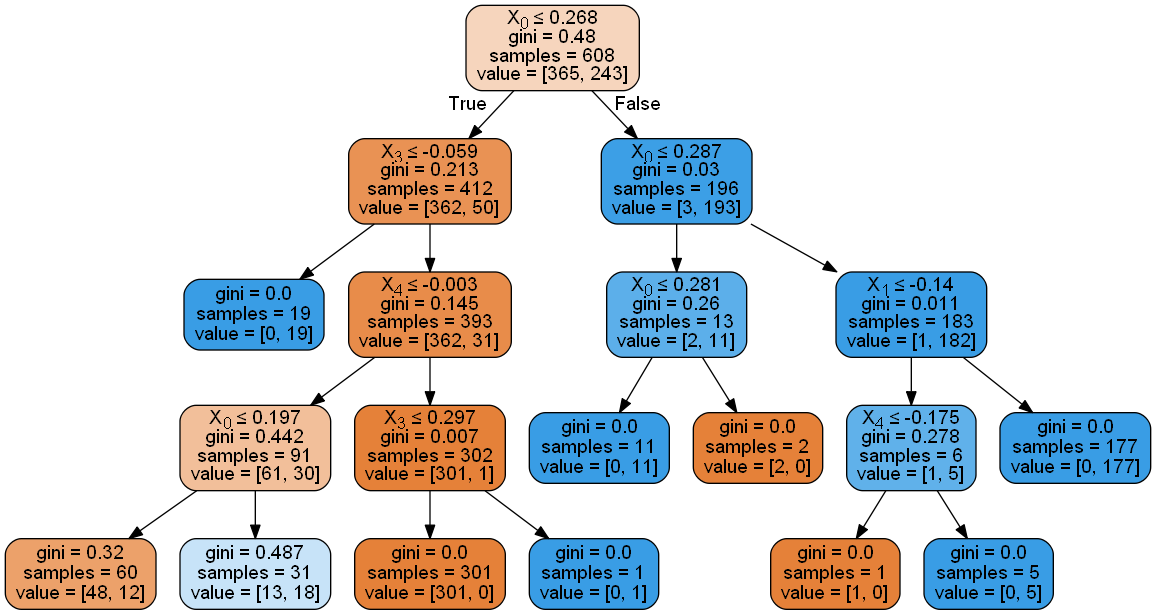

In [316]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' + 'C:/Users/jmoha/AppData/Local/conda/conda/envs/fluffy/Lib/site-packages/graphviz' + 'C:/Users/jmoha/AppData/Local/conda/conda/envs/fluffy/Lib/site-packages/PIL'

# Create DOT data
dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
from IPython.display import Image
Image(graph.create_png())

## Comparision of Models Before and After PCA

### Before PCA

In [317]:
Classification = {'Models before PCA':['KNN classification','Logistic Regrerssion','Linear SVM','SVC - linear','SVC - rbf','SVC - poly','Decision Tree'],'Avg.Train Score':[0.9605,0.9934,0.9803,0.9490,0.9770,0.9572,0.9671],'Avg_Test_Score':[0.9477,0.9869,0.9608,0.9150,0.9608,0.9281,0.9542]}
Classification_score = pd.DataFrame(Classification)
Classification_score

,Models before PCA,Avg.Train Score,Avg_Test_Score
0,KNN classification,0.9605,0.9477
1,Logistic Regrerssion,0.9934,0.9869
2,Linear SVM,0.9803,0.9608
3,SVC - linear,0.9490,0.9150
4,SVC - rbf,0.9770,0.9608
5,SVC - poly,0.9572,0.9281
6,Decision Tree,0.9671,0.9542


From the above information we conclude Logistic Regeression with L1 penalty and C=100 is our best classification model

### After PCA

In [321]:
Classification = {'Models after PCA':['KNN classification','Logistic Regrerssion','Linear SVM','SVC - linear','SVC - rbf','SVC - poly','Decision Tree'],'Avg.Train Score':[0.9655,0.9326,0.9408,0.9424,0.9441,0.9474,0.9589],'Avg_Test_Score':[0.9346,0.9150,0.9085,0.9150,0.9150,0.9216,0.9216]}
Classification_score = pd.DataFrame(Classification)
Classification_score

,Models after PCA,Avg.Train Score,Avg_Test_Score
0,KNN classification,0.9655,0.9346
1,Logistic Regrerssion,0.9326,0.9150
2,Linear SVM,0.9408,0.9085
3,SVC - linear,0.9424,0.9150
4,SVC - rbf,0.9441,0.9150
5,SVC - poly,0.9474,0.9216
6,Decision Tree,0.9589,0.9216


After performing PCA, From the above information we conclude KNN Classification with k=5 is our best classification model

#### Before PCA, the models had high accuracies for both test and train. After dimesionality reduction by PCA, there is some loss of information, which resulted in a reduction of the train and test accuracies. So now we have a more genralized model compared to before as we are not considering the components which are not contributing to that much variance (can be considered as noise).

# Deep Learning Models

## 1. Perceptron

In [328]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [329]:
x = data.drop('Risk',axis=1)
y = data['Risk']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

In [339]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 5, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

In [340]:
#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

In [341]:
#step 3: train the model - fit
model1.fit(x_train, y_train, epochs = 50, batch_size = 300)

Epoch 1/50
608/608 [==============================] - 0s 435us/sample - loss: 0.6708 - acc: 0.5872
Epoch 2/50
608/608 [==============================] - 0s 10us/sample - loss: 0.6669 - acc: 0.5872
Epoch 3/50
608/608 [==============================] - 0s 10us/sample - loss: 0.6630 - acc: 0.5872
Epoch 4/50
608/608 [==============================] - 0s 8us/sample - loss: 0.6594 - acc: 0.6053
Epoch 5/50
608/608 [==============================] - 0s 8us/sample - loss: 0.6557 - acc: 0.6414
Epoch 6/50
608/608 [==============================] - 0s 11us/sample - loss: 0.6523 - acc: 0.6464
Epoch 7/50
608/608 [==============================] - 0s 10us/sample - loss: 0.6491 - acc: 0.6464
Epoch 8/50
608/608 [==============================] - 0s 10us/sample - loss: 0.6459 - acc: 0.6464
Epoch 9/50
608/608 [==============================] - 0s 11us/sample - loss: 0.6427 - acc: 0.6480
Epoch 10/50
608/608 [==============================] - 0s 11us/sample - loss: 0.6395 - acc: 0.6480
Epoch 11/50
608/608 

In [342]:
#step 4: evaluation
loss_and_metrics = model1.evaluate(x_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

153/153 [==============================] - 0s 595us/sample - loss: 0.5415 - acc: 0.8562
Test Loss 0.5415356502034305
Test Accuracy 0.85620916


## 2. MLP

In [347]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 5, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

In [348]:
#step 2: compile the model
model2.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

In [349]:
#step 3: train the model
model2.fit(x_train, y_train, epochs = 30, batch_size = 150)

Epoch 1/30
608/608 [==============================] - 0s 618us/sample - loss: 0.7008 - acc: 0.6003
Epoch 2/30
608/608 [==============================] - 0s 18us/sample - loss: 0.6885 - acc: 0.6003
Epoch 3/30
608/608 [==============================] - 0s 21us/sample - loss: 0.6775 - acc: 0.6003
Epoch 4/30
608/608 [==============================] - 0s 16us/sample - loss: 0.6674 - acc: 0.6003
Epoch 5/30
608/608 [==============================] - 0s 20us/sample - loss: 0.6572 - acc: 0.6003
Epoch 6/30
608/608 [==============================] - 0s 16us/sample - loss: 0.6459 - acc: 0.6003
Epoch 7/30
608/608 [==============================] - 0s 20us/sample - loss: 0.6333 - acc: 0.6003
Epoch 8/30
608/608 [==============================] - 0s 16us/sample - loss: 0.6209 - acc: 0.6003
Epoch 9/30
608/608 [==============================] - 0s 15us/sample - loss: 0.6090 - acc: 0.6003
Epoch 10/30
608/608 [==============================] - 0s 18us/sample - loss: 0.5969 - acc: 0.6003
Epoch 11/30
608/60

In [351]:
#step 4: evaluate
model2.evaluate(x_test, y_test)

153/153 [==============================] - 0s 713us/sample - loss: 0.3805 - acc: 0.9020


[0.3805243908579833, 0.9019608]